In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("BankChurners.csv")

In [ ]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

**Exploratory Data Analysis**


In [ ]:
# dropping last 2 columns and clientNum
df = df.iloc[:,:-2]

In [ ]:
df.drop(columns = 'CLIENTNUM', inplace = True)

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df.duplicated().sum()

0

In [ ]:
#seperate numerical and categorical data
categorical_cols = df.select_dtypes(include = ['object']).columns
numerical_cols = df.select_dtypes(include= ['int64','float64']).columns

In [ ]:
print('categorical columns:',categorical_cols)
print('numerical columns:',numerical_cols)

categorical columns: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
numerical columns: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [ ]:
# unique value of eack column
for column in df[categorical_cols]:
    unique_values = df[column].unique()
    print(f'unique values in {column}:{unique_values}')

unique values in Attrition_Flag:['Existing Customer' 'Attrited Customer']
unique values in Gender:['M' 'F']
unique values in Education_Level:['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
unique values in Marital_Status:['Married' 'Single' 'Unknown' 'Divorced']
unique values in Income_Category:['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
unique values in Card_Category:['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
for column in df[categorical_cols]:
    print(df[column].value_counts())
    print('--------')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
--------
Gender
F    5358
M    4769
Name: count, dtype: int64
--------
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
--------
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
--------
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
--------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
--------


In [ ]:
x = df.drop(columns='Attrition_Flag')
y = df.Attrition_Flag

In [ ]:
x.Gender.value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

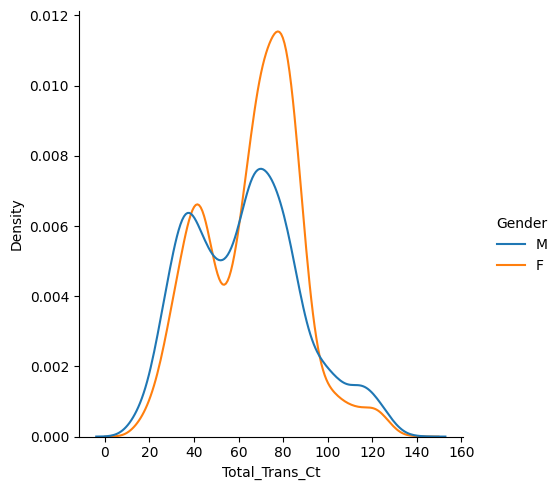

In [ ]:
sns.displot(x, x='Total_Trans_Ct', hue='Gender', kind='kde')
plt.show()

In the range (70,90) we can see a significant spike in female customers in terms of number of transactions.

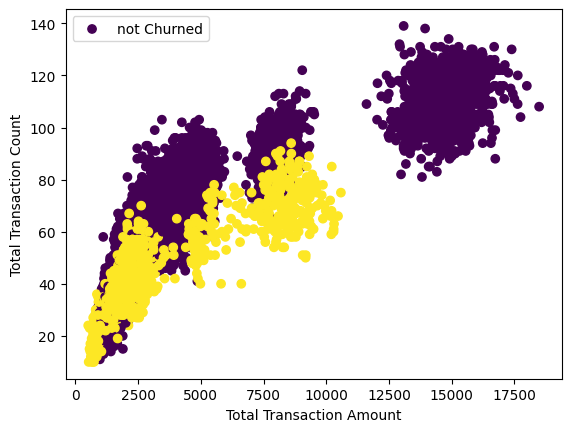

In [ ]:
plt.scatter(x.Total_Trans_Amt, x.Total_Trans_Ct, c=y.replace({'Existing Customer':0, 'Attrited Customer':1}))
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.legend(['not Churned', 'Churned'])
plt.show()

We can clearly observe that customers with Total_Trans_Amt > 12,500 AND Total_Trans_Ct > 100 have not churned at all.

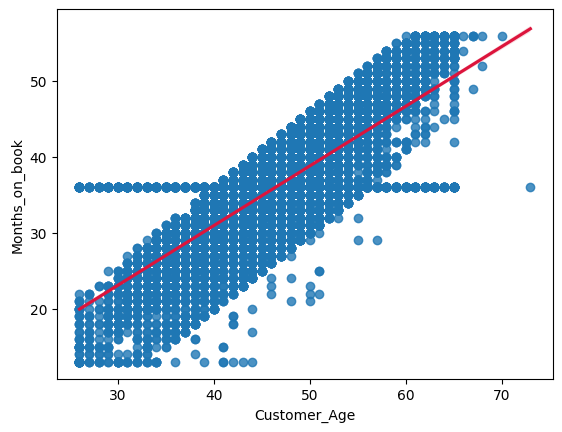

In [ ]:
sns.regplot(x, x='Customer_Age', y='Months_on_book', line_kws={"color": "crimson"})
plt.show()

By looking at the regression plot, we can see a strong positive relationship between Customer_Age and Months_on_book.

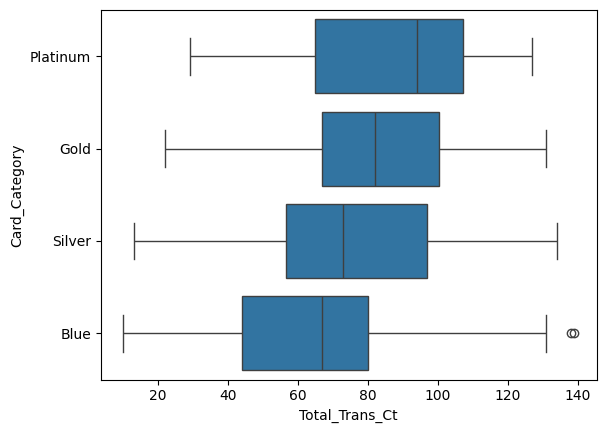

In [ ]:
sns.boxplot(data=x, x='Total_Trans_Ct', y='Card_Category', orient='h', order=['Platinum','Gold','Silver','Blue'])
plt.show()

As we move up along the tier (from Blue to Platinum), the distribution of transactions moves to the right together with the median. Also, the range gets decreased as tier increases.

NameError: name 'x_train_final' is not defined

Data PreProcessing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69, stratify=y)

In [ ]:
x_train.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
x_train.duplicated().value_counts()

False    8101
Name: count, dtype: int64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 4022 to 2426
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Amt_

Feature Encoding

In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train.value_counts()

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

In [ ]:
y_train = y_train.replace({'Existing Customer':0, 'Attrited Customer':1})
y_test = y_test.replace({'Existing Customer':0, 'Attrited Customer':1})

y_train.value_counts()

Attrition_Flag
0    6799
1    1302
Name: count, dtype: int64

In [ ]:
x_train.Marital_Status.value_counts()

Marital_Status
Married     3736
Single      3165
Divorced     601
Unknown      599
Name: count, dtype: int64

In [ ]:
df1 = pd.get_dummies(x_train.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_train = pd.concat([x_train, df1], axis=1)
x_train = x_train.drop(columns={'Gender','Marital_Status'})

In [ ]:
df2 = pd.get_dummies(x_test.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_test = pd.concat([x_test, df2], axis=1)
x_test = x_test.drop(columns={'Gender','Marital_Status'})

In [ ]:
x_train.Education_Level.value_counts()

Education_Level
Graduate         2491
High School      1620
Unknown          1207
Uneducated       1176
College           815
Post-Graduate     425
Doctorate         367
Name: count, dtype: int64

In [ ]:
x_train.Income_Category.value_counts()

Income_Category
Less than $40K    2818
$40K - $60K       1446
$80K - $120K      1231
$60K - $80K       1132
Unknown            894
$120K +            580
Name: count, dtype: int64

In [ ]:
x_train.Card_Category.value_counts()

Card_Category
Blue        7534
Silver       457
Gold          92
Platinum      18
Name: count, dtype: int64

In [ ]:
x_train.Education_Level = x_train.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_train.Income_Category = x_train.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $120K':100000, '$120K +':140000})
x_train.Card_Category = x_train.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_train = x_train.reset_index(drop=True)

In [ ]:
x_test.Education_Level = x_test.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_test.Income_Category = x_test.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $120K':100000, '$120K +':140000})
x_test.Card_Category = x_test.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_test = x_test.reset_index(drop=True)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Dependent_count           8101 non-null   int64  
 2   Education_Level           8101 non-null   int64  
 3   Income_Category           8101 non-null   int64  
 4   Card_Category             8101 non-null   int64  
 5   Months_on_book            8101 non-null   int64  
 6   Total_Relationship_Count  8101 non-null   int64  
 7   Months_Inactive_12_mon    8101 non-null   int64  
 8   Contacts_Count_12_mon     8101 non-null   int64  
 9   Credit_Limit              8101 non-null   float64
 10  Total_Revolving_Bal       8101 non-null   int64  
 11  Avg_Open_To_Buy           8101 non-null   float64
 12  Total_Amt_Chng_Q4_Q1      8101 non-null   float64
 13  Total_Trans_Amt           8101 non-null   int64  
 14  Total_Tr

Feature Reduction

In [ ]:
x_train_cont = x_train.loc[:, ['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Trans_Amt','Months_Inactive_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
x_test_cont = x_test.loc[:, ['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Trans_Amt','Months_Inactive_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

In [ ]:
x_train_disc = x_train.loc[:, ['Dependent_count','Total_Relationship_Count','Contacts_Count_12_mon','Total_Trans_Ct']]
x_test_disc = x_test.loc[:, ['Dependent_count','Total_Relationship_Count','Contacts_Count_12_mon','Total_Trans_Ct']]


In [ ]:
x_train_cat = x_train.loc[:, ['Education_Level','Income_Category','Card_Category','Gender_M','Marital_Status_Married','Marital_Status_Single',
                      'Marital_Status_Unknown']]
x_test_cat = x_test.loc[:, ['Education_Level','Income_Category','Card_Category','Gender_M','Marital_Status_Married','Marital_Status_Single',
                      'Marital_Status_Unknown']]

In [ ]:
x_train_num = pd.concat([x_train_cont, x_train_disc], axis=1)

Draw the Correlation Matrix to Check for Multi-Collinearity

In [ ]:
corr_matrix_train = x_train_num.corr()
corr_matrix_train

,Customer_Age,Months_on_book,Total_Revolving_Bal,Total_Trans_Amt,Months_Inactive_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Dependent_count,Total_Relationship_Count,Contacts_Count_12_mon,Total_Trans_Ct
Customer_Age,1.000000,0.789367,0.015129,-0.049951,0.055520,0.003927,0.002565,-0.059832,-0.006884,0.003106,-0.119019,-0.007590,-0.024552,-0.070816
Months_on_book,0.789367,1.000000,0.008303,-0.040168,0.077770,0.005407,0.004658,-0.048600,-0.012096,-0.009459,-0.099282,-0.006342,-0.015422,-0.047821
Total_Revolving_Bal,0.015129,0.008303,1.000000,0.051149,-0.044175,0.037629,-0.052217,0.054069,0.085973,0.625074,0.005349,0.018360,-0.046099,0.043418
Total_Trans_Amt,-0.049951,-0.040168,0.051149,1.000000,-0.033292,0.163763,0.159061,0.039727,0.088634,-0.081824,0.022526,-0.346572,-0.111992,0.804856
Months_Inactive_12_mon,0.055520,0.077770,-0.044175,-0.033292,1.000000,-0.014158,-0.010180,-0.041238,-0.042748,-0.012970,-0.009433,-0.001673,0.031690,-0.034358
Credit_Limit,0.003927,0.005407,0.037629,0.163763,-0.014158,1.000000,0.995964,0.009178,-0.005368,-0.483999,0.066480,-0.075058,0.025781,0.064923
Avg_Open_To_Buy,0.002565,0.004658,-0.052217,0.159061,-0.010180,0.995964,1.000000,0.004315,-0.013087,-0.539827,0.065955,-0.076658,0.029905,0.060980
Total_Amt_Chng_Q4_Q1,-0.059832,-0.048600,0.054069,0.039727,-0.041238,0.009178,0.004315,1.000000,0.381553,0.032632,-0.039560,0.052604,-0.020419,0.007214
Total_Ct_Chng_Q4_Q1,-0.006884,-0.012096,0.085973,0.088634,-0.042748,-0.005368,-0.013087,0.381553,1.000000,0.073965,0.011922,0.038071,-0.093298,0.116408
Avg_Utilization_Ratio,0.003106,-0.009459,0.625074,-0.081824,-0.012970,-0.483999,-0.539827,0.032632,0.073965,1.000000,-0.028359,0.066927,-0.058591,0.008318


Standardize continuous model before PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_cont_std = std.fit_transform(x_train_cont)
x_test_cont_std = std.fit_transform(x_test_cont)

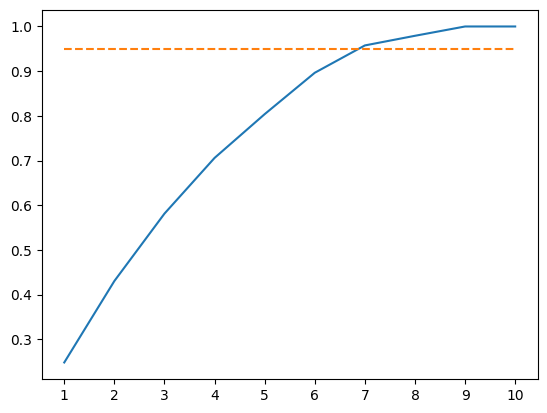

In [ ]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
pca10.fit(x_train_cont_std)
x_train_cont_pca = pca10.transform(x_train_cont_std)

l2 = []
for i in np.arange(1, 11, 1):
    l2.append(0.95)

plt.plot(np.arange(1, 11, 1), np.cumsum(pca10.explained_variance_ratio_))
plt.plot(np.arange(1, 11, 1), l2, ls='--')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [ ]:
pca7_train = PCA(n_components=7)
pca7_train.fit(x_train_cont_std)
x_train_cont_pca = pca7_train.transform(x_train_cont_std)
x_train_pca = pd.DataFrame(x_train_cont_pca, columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7'])

In [ ]:
pca7_test = PCA(n_components=7)
pca7_test.fit(x_test_cont_std)
x_test_cont_pca = pca7_test.transform(x_test_cont_std)
x_test_pca = pd.DataFrame(x_test_cont_pca, columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7'])

Merging Discrete and Categorical Variables

In [ ]:
x_train_non_cont = pd.concat([x_train_disc, x_train_cat], axis=1)
x_test_non_cont = pd.concat([x_test_disc, x_test_cat], axis=1)

Performing SelectKBest on Discrete and Categorical Variables

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
kbest = SelectKBest(score_func=f_classif, k='all')
kbest.fit(x_train_non_cont, y_train)

SelectKBest(k='all')

                     Feature        Score
0             Total_Trans_Ct  1283.192341
1      Contacts_Count_12_mon   359.974497
2   Total_Relationship_Count   185.248992
3                   Gender_M     7.022380
4     Marital_Status_Married     3.415960
5      Marital_Status_Single     2.464376
6            Income_Category     0.535813
7            Education_Level     0.491344
8            Dependent_count     0.233885
9              Card_Category     0.058307
10    Marital_Status_Unknown     0.007085


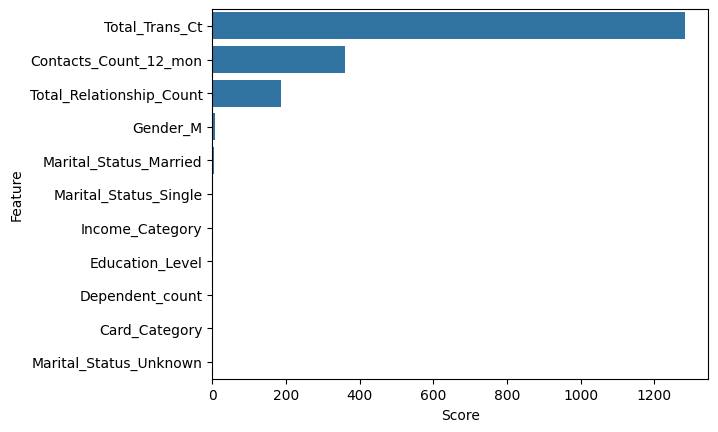

In [ ]:
kbest_scores = pd.DataFrame({'Feature':x_train_non_cont.columns, 'Score':kbest.scores_})
kbest_scores.sort_values(by='Score', ascending=False, axis=0, inplace=True)
kbest_scores.reset_index(drop=True, inplace=True)
print(kbest_scores)
sns.barplot(data=kbest_scores, x='Score', y='Feature', orient='h')
plt.show()

In [ ]:
x_train_kbest = x_train_non_cont.loc[:, ['Total_Trans_Ct', 'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Gender_M']]
x_test_kbest = x_test_non_cont.loc[:, ['Total_Trans_Ct', 'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Gender_M']]

In [ ]:
x_train_final = pd.concat([x_train_kbest, x_train_pca], axis=1)
x_train_final

,Total_Trans_Ct,Contacts_Count_12_mon,Total_Relationship_Count,Gender_M,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,64,2,4,True,0.096488,-0.135626,-0.198664,0.168579,-1.386073,-0.210081,-0.243395
1,42,3,3,True,3.278617,-0.223532,0.868490,-1.258725,0.967504,-1.481290,-1.527674
2,42,3,3,False,-0.053191,0.076082,-1.792534,-0.387965,0.508837,-0.284358,-0.387669
3,37,2,6,True,1.858103,0.845769,-0.048159,1.680935,0.897239,-1.026456,-0.387105
4,39,3,2,False,-2.280720,1.286093,-0.018306,-2.134931,-0.015873,-0.632172,-0.843226
...,...,...,...,...,...,...,...,...,...,...,...
8096,78,2,6,False,-0.432467,1.375799,-0.870789,0.640550,-0.330872,0.359217,0.595202
8097,43,3,5,False,-2.043817,0.632802,-0.846401,-1.276838,-0.288049,-0.319147,0.552615
8098,53,1,1,False,-2.220047,1.590077,-0.518820,-2.575904,-0.081349,-0.586548,-0.399670
8099,80,2,1,False,-1.409666,1.037881,-0.358971,-0.561609,-1.278977,0.078117,0.250147


In [ ]:
x_test_final = pd.concat([x_test_kbest, x_test_pca], axis=1)
x_test_final

,Total_Trans_Ct,Contacts_Count_12_mon,Total_Relationship_Count,Gender_M,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,70,2,3,True,0.090906,-0.019786,-1.628159,-0.114362,0.549638,0.276791,-0.334274
1,62,2,5,True,1.544851,0.693231,-1.098780,0.276613,-1.351019,0.047359,0.314742
2,75,1,3,False,-1.313991,-0.556891,-0.255538,-0.761691,-0.388734,0.137940,0.062965
3,28,2,4,True,-1.210043,0.316579,0.085011,-0.115983,-1.114912,-1.029384,-0.572571
4,37,3,4,True,-0.815126,1.366687,-2.290487,-0.924990,-1.103551,-0.540711,-0.338800
...,...,...,...,...,...,...,...,...,...,...,...
2021,54,4,4,True,0.063859,0.860506,-2.397607,0.538338,0.520513,0.067698,-0.018015
2022,82,2,3,False,-0.333967,-0.308675,0.499394,0.477892,-0.402134,-0.001525,-0.450027
2023,52,2,3,False,-0.240237,0.054860,-1.004737,2.346757,1.174462,0.306401,0.730131
2024,30,1,6,True,-1.137208,0.531939,-0.594343,-0.402265,1.828226,-0.336263,-0.563495


Building models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(x_train_final, y_train)
dt1.score(x_test_final, y_test)

0.9027640671273445

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
knn1.fit(x_train_final, y_train)
knn1.score(x_test_final, y_test)

0.918558736426456

Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(x_train_final, y_train)
nb1.score(x_test_final, y_test)

0.8899308983218164

SVM Classifier

In [ ]:
from sklearn.svm import SVC
svm1 = SVC(kernel='linear', random_state=69)
svm1.fit(x_train_final, y_train)
svm1.score(x_test_final, y_test)

0.9076999012833169

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=1000, oob_score=True)
rfc1.fit(x_train_final, y_train)
rfc1.score(x_test_final, y_test)

0.9437314906219151